In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


### reading data from csv file

In [2]:
data1=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data1.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### checking null values

In [6]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### replacing nan values with 0

In [7]:
#handling missing values
data1=data1.fillna(method='bfill',axis=0).fillna(0)

In [8]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B42,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.4500,C148,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
date=data1['Survived'].head(50)
high=data1['Pclass'].head(50)
low=data1['Sex'].head(50)
close=data1['Parch'].head(50)

In [10]:
date

0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    1
20    0
21    1
22    1
23    1
24    0
25    1
26    0
27    0
28    1
29    0
30    0
31    1
32    1
33    0
34    0
35    0
36    1
37    0
38    0
39    1
40    0
41    0
42    0
43    1
44    1
45    0
46    0
47    1
48    0
49    0
Name: Survived, dtype: int64

In [11]:
high

0     3
1     1
2     3
3     1
4     3
5     3
6     1
7     3
8     3
9     2
10    3
11    1
12    3
13    3
14    3
15    2
16    3
17    2
18    3
19    3
20    2
21    2
22    3
23    1
24    3
25    3
26    3
27    1
28    3
29    3
30    1
31    1
32    3
33    2
34    1
35    1
36    3
37    3
38    3
39    3
40    3
41    2
42    3
43    2
44    3
45    3
46    3
47    3
48    3
49    3
Name: Pclass, dtype: int64

In [12]:
low

0       male
1     female
2     female
3     female
4       male
5       male
6       male
7       male
8     female
9     female
10    female
11    female
12      male
13      male
14    female
15    female
16      male
17      male
18    female
19    female
20      male
21      male
22    female
23      male
24    female
25    female
26      male
27      male
28    female
29      male
30      male
31    female
32    female
33      male
34      male
35      male
36      male
37      male
38    female
39    female
40    female
41    female
42      male
43    female
44    female
45      male
46      male
47    female
48      male
49    female
Name: Sex, dtype: object

In [13]:
close

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     2
9     0
10    1
11    0
12    0
13    5
14    0
15    0
16    1
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    1
25    5
26    0
27    2
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    2
44    0
45    0
46    0
47    0
48    0
49    0
Name: Parch, dtype: int64

In [14]:
data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data visualisation

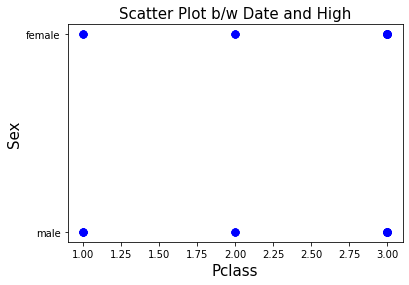

In [15]:
#Data Visualization using Matplotlib
plt.title("Scatter Plot b/w Date and High",fontsize=15)
plt.xlabel("Pclass",fontsize=15)
plt.ylabel("Sex",fontsize=15)
plt.scatter(high,low,c='blue',s=50)
plt.show()

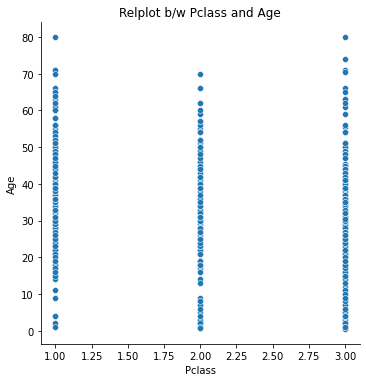

In [16]:
#Data Visualisation Using seaborn
sns.relplot(data=data1,x="Pclass",y="Age")
plt.title("Relplot b/w Pclass and Age")
plt.show()

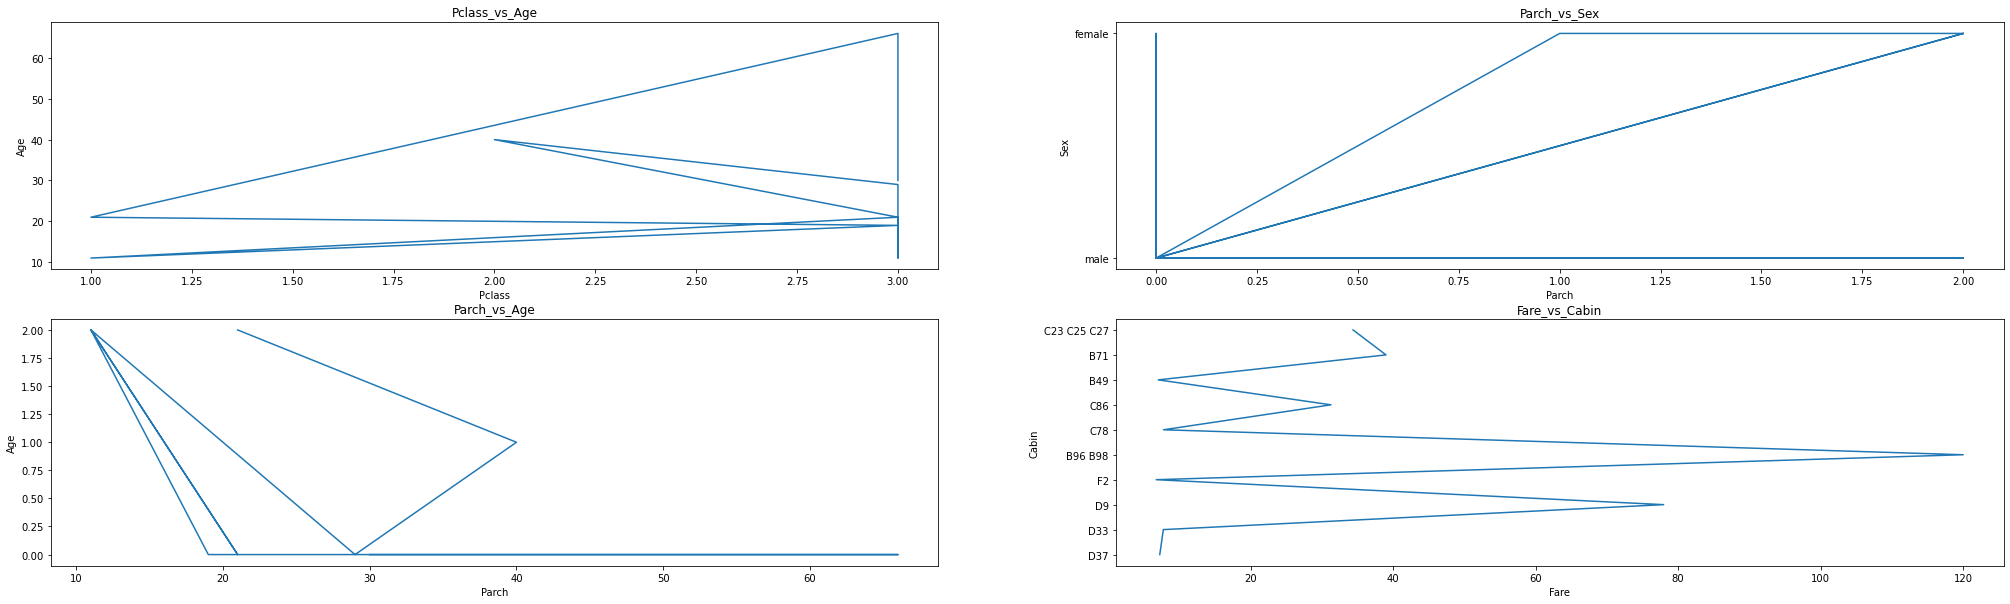

In [17]:
data =data1.sample(10)
fig, axes=plt.subplots(nrows=4, ncols=4,figsize = (35, 10))
x = data['Pclass']
y = data['Age']
plt.subplot(2,2,1)
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.title("Pclass_vs_Age")
plt.plot(x,y)
plt.subplot(2,2,2)
x = data['Parch']
y = data['Sex']
plt.xlabel("Parch")
plt.ylabel("Sex")
plt.title("Parch_vs_Sex")
plt.plot(x,y)
plt.subplot(2,2,3)
x = data['Age']
y = data['Parch']
plt.xlabel("Parch")
plt.ylabel("Age")
plt.title("Parch_vs_Age")
plt.plot(x,y)
plt.subplot(2,2,4)
x = data['Fare']
y = data['Cabin']
plt.xlabel("Fare")
plt.ylabel("Cabin")
plt.title("Fare_vs_Cabin")
plt.plot(x,y)
plt.show()


In [18]:
data1 = data1.drop('Embarked',axis=1)
data1 = data1.drop('Sex', axis = 1)
data1 = data1.drop('Ticket',axis = 1)
data1 = data1.drop('Cabin',axis = 1)

In [19]:
data1 = data1.drop('Name',axis=1)

In [21]:
X = data1.drop("Survived", axis=1)
y = data1["Survived"]


In [22]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [23]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Splitting dataset into test and train

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [25]:
len(X_train),len(X_test)

(623, 268)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(X_train, y_train)


LogisticRegression()

In [28]:
LogisticRegressionScore = mod.score(X_test, y_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_mod = mod.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred_mod)
cf_matrix

array([[137,  20],
       [ 63,  48]], dtype=int64)

Text(0.5, 1.06, 'Confusion Matrix for Logistic Regression')

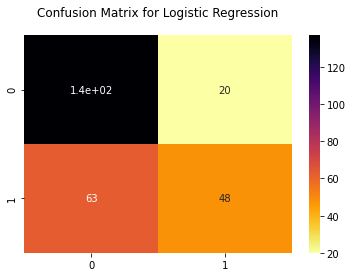

In [30]:
sns.heatmap(cf_matrix, annot=True, cmap='inferno_r')
plt.title('Confusion Matrix for Logistic Regression',fontsize=12, y=1.06)

In [31]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_mod))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       157
           1       0.71      0.43      0.54       111

    accuracy                           0.69       268
   macro avg       0.70      0.65      0.65       268
weighted avg       0.69      0.69      0.67       268



In [32]:
LogisticRegressionScore*100

69.02985074626866

### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
RandomForestClassifierScore = rfc.score(X_test,y_test)

In [35]:
y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
cf_matrix

array([[129,  28],
       [ 58,  53]], dtype=int64)

Text(0.5, 1.06, 'Confusion Matrix for Random Forest Classifier')

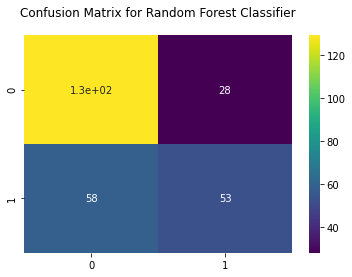

In [36]:
sns.heatmap(cf_matrix, annot=True, cmap='viridis')
plt.title('Confusion Matrix for Random Forest Classifier',fontsize=12,y=1.06)

In [37]:
print(metrics.classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       157
           1       0.65      0.48      0.55       111

    accuracy                           0.68       268
   macro avg       0.67      0.65      0.65       268
weighted avg       0.68      0.68      0.67       268



In [38]:
RandomForestClassifierScore*100

67.91044776119402

### Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)

In [41]:
y_pred_dtc = dtc.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred_dtc)
cf_matrix

array([[118,  39],
       [ 56,  55]], dtype=int64)

Text(0.5, 1.06, 'Confusion Matrix for Decision Tree Classifier')

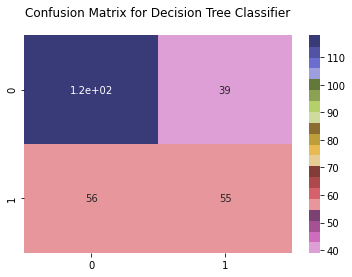

In [42]:
sns.heatmap(cf_matrix, annot=True, cmap='tab20b_r')
plt.title("Confusion Matrix for Decision Tree Classifier",fontsize=12, y=1.06)

In [43]:
print(metrics.classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       157
           1       0.59      0.50      0.54       111

    accuracy                           0.65       268
   macro avg       0.63      0.62      0.62       268
weighted avg       0.64      0.65      0.64       268



In [44]:
DecisionTreeClassifierScore*100

64.55223880597015

In [46]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
scores = cross_val_score(rf,X_train,y_train,cv=2,scoring='accuracy')
print("scores :",scores)
print("mean :",scores.mean())
print("standard deviation :",scores.std())

scores : [0.6474359  0.66559486]
mean : 0.6565153763706819
standard deviation : 0.00907947893478439


### Accuracy of Three Machine learning Models

In [47]:
print("Accuracy obtained by LogisticRegressionModel : ",LogisticRegressionScore*100)
print("Accuracy obtained by RandomForestClassifierModel :",RandomForestClassifierScore*100)
print("Accuracy obtained by DecisionTreeClassifierModel :",DecisionTreeClassifierScore*100)

Accuracy obtained by LogisticRegressionModel :  69.02985074626866
Accuracy obtained by RandomForestClassifierModel : 67.91044776119402
Accuracy obtained by DecisionTreeClassifierModel : 64.55223880597015
